In [20]:
import keras
keras.__version__

'2.2.2'

# 영화 리뷰 분류하기: 이진 분류( a binary classification )의 예시

이 Notebook은 [Deep Learning with Python]의 3장 5절에 나오는 예제 코드가 포함되어있습니다. 
원본 텍스트(Deep Learning with Python)에 훨씬 더 많은 자료, 특히 추가 설명과 그림들이 포함되어 있습니다.
여기에서는 예제 코드와 코드에 관련된 설명만 제공됩니다.

----


Two-class 분류 또는 이진 분류는 가장 널리 적용되는 종류의 기계 학습 문제 일 수 있습니다.
이 예제에서는 리뷰의 텍스트 내용을 기준으로 영화 리뷰를 "긍정적인"리뷰와 "부정적인"리뷰로 분류하는 방법을 배우게 됩니다.

## IMDB 데이터 세트

"IMDB dataset", 인터넷 영화 데이터베이스의 50,000편에 이르는 높게 양극화된 리뷰 세트로 작업할 것입니다.
학습을 위한 25,000개의 리뷰와 테스트를 위한 25,000 개의 리뷰로 나뉘며, 각 세트는 50%의 부정적인 리뷰와 50%의 긍정적인 리뷰로 구성됩니다.

왜 두 개의 분리된 학습&테스트 세트를 보유하고 있을까요?
학습에 사용한 것과 동일한 데이터로 머신러닝 모델을 테스트해서는 안 되기 때문입니다!
왜냐하면 학습 데이터에서 잘 작동한다고 해서 실제로 본 적이 없는 데이터(test data)에서 잘 작동한다는 것을 의미하는 것이 아니며, 모델에서 새로운 데이터(test data)에 대한 작동이 중요하기 때문입니다. (이미 학습 데이터의 라벨을 알고있기 때문에 학습 데이터에 대해 모델이 예측할 필요는 없습니다.) 

예를 들어 학습 샘플과 모델의 목표 사이에서 모델이 단순히 매핑하는 것으로 기억하는 것으로 그칠 수 있습니다.
그것은 예전에 보지 못한 데이터(test data)에 대한 목표를 예측하는 데에는 전혀 쓸모가 없습니다. 
이 부분에 대해서는 다음 장에서 더 자세히 설명할 것입니다.

MNIST 데이터 세트와 마찬가지로 IMDB 데이터 세트는 Keras와 함께 제공됩니다.
이것은 이미 사전처리가 되었으며, 리뷰(일련의 단어)는 각 일련의 정수로 변환되었습니다. 여기서 각 정수는 사전의 특정 단어를 의미합니다. 

다음 코드는 데이터 세트를 로드합니다. (처음 실행하면 약 80MB의 데이터가 시스템에 다운로드됩니다).

In [21]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

인수 `num_words=10000`는 학습 데이터에서 가장 자주 발생하는 상위 10,000개의 단어만 보유한다는 것을 의미합니다. 
자주 사용되지 않는 단어는 삭제됩니다. 이를 통해 다루기 쉬운 크기의 벡터 데이터로 작업할 수 있습니다. 

변수`train_data`와`test_data`는 리뷰 목록으로, 각 리뷰는 단어 색인 목록(일련의 단어를 인코딩한 것)이 됩니다.
`train_labels`과`test_labels`는 0과 1의 목록입니다. 0은 "부정적인 것"을 나타내며 1은 "긍정적인 것"을 나타냅니다.

In [22]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [23]:
train_labels[0]

1

가장 자주 사용되는 상위 10,000 개 단어로 제한했으므로, 단어 색인은 10,000 개를 초과하지 않습니다.

In [24]:
max([max(sequence) for sequence in train_data])

9999

재미삼아, 리뷰 중 하나를 영어 단어로 빠르게 디코딩 하는 방법은 다음과 같습니다. 

In [25]:
# word_index는 단어를 정수 인덱스에 매핑하는 사전입니다.
word_index = imdb.get_word_index()

# 정수 인덱스를 단어에 매핑합니다.(dict 클래스 이용)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 리뷰를 해독합니다 : 단어 색인이 3으로 상쇄되었음을 주목하세요 
# 왜냐하면 0,1, 및 2는 "패딩","시퀀스 시작"및 "알 수 없음"에 대한 예약된 인덱스이기 때문입니다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [26]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## 데이터 준비하기


정수 리스트를 신경망에 공급할 수 없습니다. 따라서 정수 리스트를 tensor로 변환해야 합니다. 우리가 할 수 있는 두 가지 방법이 있습니다 :

* 1) 리스트가 모두 같은 길이가 되도록 채워 넣은 다음, 정수 tensor 형태 `(samples, word_indices)`로 리스트를 변환합니다. 그다음 네트워크에서 첫 번째 레이어로 이러한 정수형 tensor를 처리할 수 있는 레이어를 사용하세요 (`Embedding`레이어,  이 책의 뒷부분에서 자세히 다룰 것입니다).

* 2) 0과 1의 벡터로 바꾸기 위해서 리스트를 one-hot-인코딩을 할 수 있습니다. 구체적으로 예를 들어, 시퀀스 `[3, 5]`를 인덱스 3과 5를 제외하고 모두 0인 10,000차원의 벡터로 바꾸는 것을 의미합니다. 그런 다음 네트워크의 첫 번째 레이어로 부동 소수점 벡터 데이터를 처리할 수 있는 `Dense` 레이어를 사용할 수 있습니다. 

우리는 후자의 해결책으로 진행할 것입니다. 데이터를 벡터화 합시다! 최대한 명확하게 하기 위해서 수동으로 처리합니다.

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 모두 0인 모양의 행렬을 만듭니다. (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # result[i]의 특정 인덱스들을 1로 설정합니다.
    return results

# 벡터화된 학습 데이터 
x_train = vectorize_sequences(train_data)
# 벡터화된 테스트 데이터 
x_test = vectorize_sequences(test_data)

샘플은 다음과 같습니다:

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

이 라벨을 벡터화해야하는데, 이는 간단합니다.

In [28]:
# 벡터화된 라벨
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

이제 데이터를 신경망에 공급할 준비가 되었습니다. 

## 네트워크 구축하기


우리의 입력 데이터는 단순한 벡터이며, 우리의 라벨은 스칼라(1과 0)입니다: 이것은 가장 쉬운 설정입니다.
또한 이러한 문제를 잘 수행하는 네트워크의 유형은 `relu` 활성화 함수를 이용한 fully-conntected (`Dense`) 레이어의 간단한 스택입니다.`Dense(16, activation='relu')` 

각 `Dense` 레이어(16)에 전달되는 인수는 레이어의 '숨겨진 유닛(hidden units)'의 수입니다. 숨겨진 유닛의 수란 무엇일까요? 이것은 레이어에 표현된 공간의 차원입니다. 이전 장에서 `relu` 활성화 함수가 있는 각각의 `Dense` 레이어가 다음과 같은 일련의 tensor연산을 구현한다는 것을 기억할 것입니다.

`output = relu(dot(W, input) + b)`

16개의 숨겨진 유닛을 가짐으로써 `W`의 가중치 행렬은 `(input_dimension, 16)` 모양을 가지게 됩니다. `W`가 있는 dot product(내적)은 입력 데이터를 16차원 표현 공간에 투영합니다. (그리고 나서 사선 벡터 `b`를 추가하고 `relu`연산을 적용합니다.)
표현 공간의 차원을 "내부 표현을 학습할 때 네트워크가 가질 수 있는 자유의 정도"로써 직관적으로 이해할 수 있습니다. 더 많은 숨겨진 유닛 (고차원 표현 공간)을 사용하면 네트워크가 보다 복잡한 표현을 학습할 수 있지만, 네트워크가 더 많은 계산 비용을 발생시키고, 불필요한 패턴을 학습하게 될 수 있습니다. (즉, 해당 패턴이 학습 데이터에 대한 성능은 향상되지만 테스트 데이터에게는 해당되지 않을 수 있습니다.)

이러한 고밀도 레이어 스택에 대해서 두 가지 주요 아키텍처에 대한 결정을 내려야 합니다. 

* 얼마나 많은 레이어를 사용할 것인가.
* 얼마나 많은 '숨겨진 유닛(hidden units)'을 각 레이어에서 선택할 것인가

다음 장에서는 이러한 결정을 하는데 도움이 되는 일반적인 원칙을 배우게 됩니다. 
당분간은 아키텍처를 선택하는 것에 대해 우리를 신뢰해야 합니다:
각각 16개의 숨겨진 유닛을 가진 두 개의 중간 계층과 현재 리뷰의 감정에 관한 스칼라 예측을 출력하는 세 번째 계층을 포함하는 것입니다.
중간계층은 '활성화 함수'로 `relu`를 사용하고 최종 계층은 `sigmoid` 활성화 함수를 이용하여 확률을 출력합니다. 
(0과 1사이의 점수로, 샘플이 목표 '1'을 얼마나 가질 확률이 있는지 나타냅니다. 즉, 리뷰가 긍정적일 확률을 나타냅니다.)

`relu`(수정된 선형 단위)는 음의 값은 0으로 만드는 기능을 하는 반면, `sigmoid`는 임의의 값을 [0,1]사이의 간격으로 "짓눌러(squashes)" 해당 값을 확률로 해석할 수 있는 값으로 출력합니다.

네트워크는 아래 이미지처럼 구성됩니다. 

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

그리고 Keras 구현은 이전에 보았던 MNIST 예제와 매우 유사합니다.

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



마지막으로 손실 함수와 최적화 도구를 선택해야 합니다.
우리는 이진 분류 문제에 직면하고 있고 우리의 네트워크의 산출은 확률이기 때문에 (`sigmoid` 활성화가 있는 단일-유닛 레이어로 네트워크를 마무리 합니다.), `binary_crossentropy` 손실 함수를 사용하는 것이 가장 좋습니다.
이것이 단지 확실한 선택은 아닙니다. 예를들어 `mean_squared_error`를 사용할 수 있습니다. 그러나 교차 엔트로피(`binary_crossentropy`)는 일반적으로 확률을 출력하는 모델을 다룰 때 가장 좋은 선택입니다.

교차 엔트로피는 정보 이론 분야에서 어떤 양을 뜻하는데, 이는 확률 분포간의 차이 또는 우리 케이스에서 정답과 예측값에 대한 차이(혹은 거리)를 측정하는 것입니다. 

`rmsprop` 옵티 마이저와`binary_crossentropy` 손실 함수로 모델을 구성하는 단계가 있습니다. 이는 학습 도중 정확성을 모니터링할 수 있도록 합니다. 

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

우리는 옵티 마이저, 손실 함수 및 메트릭을 문자열로 전달합니다. 이는 `rmsprop`,`binary_crossentropy` 및`accuracy`가 Keras의 부분으로 패키지화되어 있기 때문에 가능합니다.
경우에 따라 옵티 마이저의 매개 변수를 구성하거나 사용자 정의 손실 함수 또는 매트릭 함수를 전달할 수 있습니다.
이것은 옵티 마이저 클래스 인스턴스를 `optimizer` 인자로 전달함으로써 가능합니다 :

In [31]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

후자는 함수의 객체를 손실(loss) 혹은 메트릭(metrics) 인수로 전달하여 수행할 수 있습니다.

In [15]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 접근 방식을 증명해봅시다

이전에는 본 적이 없는 데이터(test data)에 대한 모델의 정확도를 학습하는 동안 이를 모니터링하기 위해서 원본 학습 데이터에서 10,000개의 샘플을 분리하여 '유효성 검사 집합(validation set)'을 만들었습니다.

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

512개 샘플의 mini-batch에서 20 epochs 동안 우리의 모델을 학습시킵니다.(`x_train`과 `y_train` tensor에 있는 모든 샘플을 20번 동안 반복합니다.) 
동시에 우리가 따로 구분하였던 10,000개의 샘플에 대한 손실과 정확도를 동시에 모니터할 수 있습니다.
유효 데이터를 이는 `validation_data` 인수로 전달하면 됩니다. 


In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.4977 - acc: 0.7947 - val_loss: 0.3716 - val_acc: 0.8715
Epoch 2/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.2957 - acc: 0.9043 - val_loss: 0.2990 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.2160 - acc: 0.9283 - val_loss: 0.3086 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1741 - acc: 0.9431 - val_loss: 0.2834 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 4s 241us/step - loss: 0.1414 - acc: 0.9542 - val_loss: 0.2864 - val_acc: 0.8847
Epoch 6/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1142 - acc: 0.9653 - val_loss: 0.3103 - val_acc: 0.8805
Epoch 7/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.0970 - acc: 0.9710 - val_loss: 0.3145 - 


CPU에서, 각 epoch 당 2초가 안되게 걸릴 것이며, 학습은 20초가 넘게 걸릴 것입니다. 
모든 epoch가 끝날 때마다, 모델이 유효 데이터(validation data)에서 10,000개의 샘플의 손실과 정확도를 계산하는데 잠시 동안 멈출 수 있습니다.
 
`model.fit()`의 호출은 `History`객체를 반환합니다. 이 객체는 `history`의 멤버로, 학습이 진행되는 도중에 발생한 모든 것에 대한 데이터가 들어있는 사전입니다.

한번 볼까요!

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

`history`에는 4개의 항목(학습 및 유효성 검사 도중에 모니터링 된 메트릭 당 하나)이 포함됩니다. 

Matplotlib을 사용하여 학습 및 유효성 검사 손실과 학습 및 검증 정확도를 나란히 표시합니다.

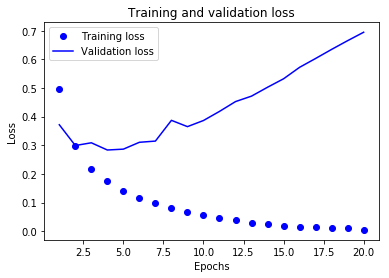

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "blue dot"에 대한 것입니다.
plt.plot(epochs, loss, 'bo', label='Training loss')

# "b"는 "solid blue line" 에 대한 것입니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

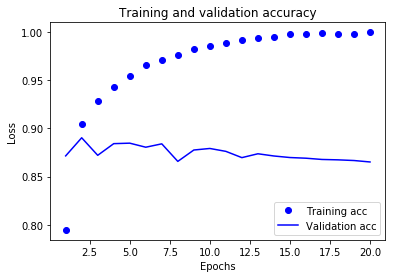

In [42]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

위의 점은 학습 손실과 정확도이며, 실선은 유효성 검사의 손실과 정확도입니다.
결과는 네트워크의 랜덤 초기화 값(초기화 설정)이 다르기 때문에 약간 다르게 출력될 수 있습니다.

보시다시피, 학습의 손실은 매 epoch마다 감소하고, 학습의 정확도는 매 epoch마다 증가하는 것을 볼 수 있습니다. 
이것은 gradient descent optimization 알고리즘을 실행할 때 예상되는 결과입니다. 즉, 우리가 최소화하려는 손실값은 매번 반복할 때마다 더 낮아져야 합니다.
그러나 유효성 검사의 손실과 정확성에 대한 경우는 그렇지 않습니다 : 네 번째 epoch에서 가장 높은 값을 가지는 것을 볼 수 있습니다.
이것은 이전에 경고했던 부분의 예시입니다. 즉, 학습 데이터를 더 잘 수행하는 모델은 반드시 이전에 보지 못했던 데이터(test data)에 대해서 더 나은 결과를 가져다줄 모델은 아니라는 것입니다. 정확히 말하자면, 이것은 `과적합(overfitting)`입니다. 두 번째 epoch 이후, 학습 데이터를 지나치게 최적화했습니다. 결국 학습(train) 데이터의 특정한 representations(표현형)을 배우게(learning) 되었고 학습 세트 이외의 데이터에 대해서는 일반화하지 않게 된 것입니다. 이 경우에는, `과적합(overfitting)`을 방지하기 위해서 세 번째 epoch 이후에 학습을 중단할 수 있습니다.

일반적으로 `과적합(overfitting)`을 줄이기 위한 다양한 기술이 있고 이는 다음 장에서 다룰 것입니다. 

처음부터 4 epoch 동안 새로운 네트워크를 학습시키고, 테스트 데이터에서 평가를 해봅시다.

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 8s 327us/step - loss: 0.4738 - acc: 0.8220
Epoch 2/4
25000/25000 [==============================] - 5s 203us/step - loss: 0.2673 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.2030 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 10s 417us/step


In [44]:
results

[0.31248216235160825, 0.87544]

꽤 원시적인 접근으로 88%의 정확도를 달성했습니다. 최첨단의 접근법으로는 95% 가까이 도달할 수 있어야 합니다.

## 학습된 네트워크를 이용하여 새로운 데이터에 대한 예측 얻어보기

네트워크를 학습 시킨 뒤, 실제 환경에서 사용해봅시다. 
`predict`메서드를 이용하면 리뷰가 긍정적일 가능성을 얻을 수 있습니다:

In [45]:
model.predict(x_test)

array([[0.16028301],
       [0.9998337 ],
       [0.38389918],
       ...,
       [0.07965256],
       [0.04822339],
       [0.46587464]], dtype=float32)

보시는 바와 같이, 네트워크는 일부 샘플 (0.99개 이상, 0.01개 이하)에 대해서 매우 신뢰도가 낮지만, 다른 샘플(0.6, 0.4)에 대해서는 신뢰도가 덜 낮습니다.

## 추가로 실험해보기


* 예제는 2개의 숨겨진 레이어(hidden layer)를 사용하고 있었습니다. 1개 또는 3개의 숨겨진 레이어를 사용하여 검증 및 테스트의 정확도에 어떤 영향을 미치는지 확인해 보세요
* 32 유닛이나 64 유닛과 같이, 더 숨겨진 유닛(hidden unit) 숨겨진 유닛이 적은 레이어를 사용해보세요...
* `binary_crossentropy`대신 `mse`손실 함수를 이용해보세요
* `relu`대신 `tech` (신경망 초기에 유행했던 활성화 함수) 활성화 함수를 이용해보세요

이러한 실험들을 통해서 비록 결과들이 개선될 수 있지만, 예제에서 선택한 구조들이 모두 상당히 합리적이라는 것을 확신시켜 줄 것입니다!

## 결론

이 예제에서 주의해야 할 사항은 다음과 같습니다. 

* 일반적으로 신경망에 -- tensors --를 공급하려면 원시 데이터를 대략적으로 전처리해주어야 합니다. 일련의 단어의 경우, 2진 벡터로 처리할 수 있지만, 다른 인코딩 방법 역시 있습니다.
* `relu` 활성화 함수를 이용한 `Dense` 레이어 스택은 감정 분류를 비롯한 다양한 문제를 해결할 수 있으며, 자주 사용하게 될 것입니다.
* 이진 분류 문제(두 개의 출력 클래스)에서, 네트워크는 1개의 유닛의 `Dense`계층과 `sigmoid`활성화 함수로 마무리되어야 합니다. 즉, 네트워크의 출력은 확률을 인코딩하는 0과 1사이의 스칼라여야 합니다.
* 이진 분류 문제에서 스칼라 `sigmoid` 출력을 이용한다면, 반드시 `binary_crossentropy` 손실함수를 이용해야 합니다.
* `rmsprop` 옵티 마이저는 일반적으로 문제가 무엇이든 최적화된 옵티 마이저입니다. 따라서 걱정할 필요가 없습니다.
* 모델이 그들이 학습 데이터를 더 잘 알게됨에 따라서, 신경망은 결국 `과적합(overfitting)` 하게되고, 이전에 보지 못했던 데이터에 대해서 점점 더 나쁜 결과를 얻게될 것입니다.
